# Implementation of a Dense Neural Networks with multiple layers for Binary Classification using numpy (Deep Learning)

## Table of Contents
* [1. Introduction](#Deep_neural)

* [2. Forward Propagation](#Forward_prop)

* [3. Back Propagation with Gradient Descent](#Back_prop)

* [4. Activation Functions](#Act_fun)

* [5. Python Class Implementation](#python_class)
    * [5.1. Data Structure (Dictionary) definitions](#python_class1)
    * [5.2. Member Functions](#python_class2)
    * [5.3. Code Listing](#python_class3)
    
* [6. Validation on the Wisconsin Breast Cancer dataset and comparison with TensorFlow](#validation)
    * [6.1. Loading the WI Breast Cancer dataset & EDA](#validation1)
    * [6.2. Data Cleanup and conversion to numpy arrays](#validation2)
    * [6.3. Train Test Split using scikit learn train test split algorithm](#validation3)
    * [6.4. Implemented DL Network Architecture definition](#validation4)
    * [6.5. The Fitting process](#validation5)
    * [6.6. Making Predictions](#validation6)
    * [6.7. Evaluating the model performance](#validation7)
    * [6.8. Comparison with TensorFlow](#validation8)
* [7. Conclusion](#conclusion)

## 1. Introduction <a class="anchor" id="Deep_neural"></a>

The following notebook describes the implementation of a deep neural network for binary classification task using numpy library and python dictionaries. Deep Learning has revolutionized the field of machine learning in recent times with applications in the area of Computer Vision, Natual Language Processing, Sequence modeling etc. Neural networks are highly complex data structures and can be expensive to train due to the large number of parameters involved. Neural networks are another class of optimization problems similar to least square regression and maximum liklihood estimates which are used in various classification algorithms. 

   A dense neural network is one of the most generic type of neural network with all the nodes in one layer connected to  all the other nodes in the next layer and so on. Dense neural networks are well suited for non linear problems due to the non-linear nature of the activation functions used and dense connections between nodes. The figure below shows the architecture a dense deep neural network with 3 layers and many nodes in each layer used for the binary classification task. Please refer *Deep Learning* by Goodfellow et al. (https://www.deeplearningbook.org/) and Andrew Ng's Neural networks and Deep Learning Course (https://www.coursera.org/learn/neural-networks-deep-learning/) for more details. 

<br>
<br>

<img src="./Dense_Neural_Network.JPG" style="width:850px;height:400px;">
<p>

    
In the above figure $X$ is the input feature matrix and $y_{true}$ is the true training label vector (0 or 1). 

   
$$X=\begin{bmatrix}
    x_{1,1} & x_{1,2} & ....\\
    x_{2,1} & x_{2,2} & ....\\
    ....                    \\
    . & ....                    \\
    . & ....                    \\
    x_{m,1} & .... & x_{m,n_0}\\
    \end{bmatrix}$$
    

 $$ y = \begin {bmatrix}
          1 \\
          0 \\
          .     \\
          .     \\
          1 \\
         \end{bmatrix} $$

Here the feature matrix X is of dimension $(m,n_0)$ and the output label y is a 1D array of dimension $(m,1)$

$W's$ are the network weight matrices and $b's$ are the bias arrays. In this implementation the bias is a vector instead of a single number for each layer. $Z$ represents the linear transformation of the input data and $A$ is the activation function applied to the linear transformation. The activation functions implemented in this investigation are *Sigmoid, Rectified Linear Unit(RELU), Leaky RELU and tanh*. Since this is a binary classification task, the final node always uses the *sigmoid* activation function whose output varies between 0 and 1 - which then can be used for predicting the binary class labels. The values of the elements in the weight matrices and bias vectors need to be fit for making accurate predictions based on the training set. A loss function is defined and minimization of the loss function using gradient descent optimization algorithm is performed. The loss function is give as follows,

$$ Loss_i = - y^{i}_{true} . \log(\sigma(Z^{i,L})) - (1-y^{i}_{true}) . \log(1-\sigma(Z^{i,L})) $$

which is called the cross-entropy loss function (named after entropy-temperature-pressure relationship from Thermodynamics). This represents loss or error for a single training example. The objective function for gradient descent needs to consider all of the training set to best fit the weights. So, an average loss is calculated over the training set as shown below which is called the cost function.

$$ Cost  J = -\frac{1}{m}\sum_{i=1}^{m}y^{i}_{true} . \log(\sigma(Z^{i,L})) + (1-y^{i}_{true}) . \log(1-\sigma(Z^{i,L}))$$

## 2. Forward Propagation <a class="anchor" id="Forward_prop"></a>

Transforming the input features, as we move from left to right all the way to the final node is called the forward propagation. The forward pass is a series of matrix operations dependent upon the structure of the neural network. 

The feature transformation in the forward pass is as follows.

$$Layer_1 \,\,\,\, Z^1 = W_1.X^T + b_1,\, A^1 = G(Z^1)$$

$$Layer_2 \,\,\,\, Z^2 = W_2.A^1 + b_2,\, A^2 = G(Z^2)$$

$$Layer_3 \,\,\,\, Z^3 = W_3.A^2 + b_3,\, A^3 = G(Z^3)$$

$$.....$$

$$.....$$

$$Layer_L \,\,\,\, Z^L = W_L.A^{L-1} + b_L,\, A^L = G(Z^L)$$

where 

$\begin{equation*}
W_1 =\begin{bmatrix}
W^{1,1}_1 & W^{1,2}_1 & ... W^{1,n_0}_1\\
W^{2,1}_1 & W^{2,2}_1 & ....\\
....                    \\
....                    \\
....                    \\
W^{n_1,1}_1 & .... & W^{n_1,n_0}_1\\
\end{bmatrix},
b_1 = \begin{bmatrix}
b^1_1\\
b^2_1\\
.\\
.\\
b^{n_1}_1\\
\end{bmatrix},
W_2 = \begin{bmatrix}
W^{1,1}_2 & W^{1,2}_2 & ... W^{1,n_1}_2\\
W^{2,1}_2 & W^{2,2}_2 & ....\\
....                    \\
....                    \\
....                    \\
W^{n_2,1}_2 & .... & W^{n_2,n_1}_2\\
\end{bmatrix},
b_2 = \begin{bmatrix}
b^1_2\\
b^2_2\\
.\\
.\\
b^{n_2}_2\\
\end{bmatrix},....
W_L = \begin{bmatrix}
W^{1,1}_L & W^{1,2}_L & ... W^{1,n_{L-1}}_L\\
W^{2,1}_L & W^{2,2}_L & ....\\
....                    \\
....                    \\
....                    \\
W^{n_L,1}_L & .... & W^{n_L,n_{L-1}}_L\\
\end{bmatrix},
b_L = \begin{bmatrix}
b^1_L\\
b^2_L\\
.\\
.\\
b^{n_L}_L\\
\end{bmatrix}
\end{equation*}$

Here L is the number of layers in the neural network, G represents the activation function of each layer. The zeroth layer of the neural network is the feature matrix $X$. The dot in the above equations represent matrix multiplication. In the above figure $n_{0}$ represents the number of features in the $X$ matrix and $m$ is the number of training examples. The weight matrix in the first layer $W_{1}$ is of size $(n_1,n_0)$ and feature matrix X is of size $(m,n_0)$. So feature matrix need to be transposed before performing the dot product. The resulting $Z^1$ is of size $(n_1,m)$. The activation function matrix $A^1$ is calculated by applying the activation function to each element of the $Z^1$ so it has the same dimensions as $Z^1$. For the next layer the linear combination matrix $Z^2$ is calculated using $A^1$, weight matrix $W_2$ and the bias vector $b_2$. The activation matrix $A^2$ is calculated by using the activation function for that layer. This transformation again changes the dimensions and the values of incoming data. This process is continued until the last layer with the prediction of the probability of binary class label using the $sigmoid$ activation function. This basically constitutes Forward propagation.

## 3. Back Propagation with Gradient Descent <a class="anchor" id="Back_prop"></a>

At the end of the forward pass, the loss function is calculated for each training sample. This process is repeated for all m training examples and an overall cost function which is an average of all the losses is estimated. What values of the weights and biases which reduces this cost function is the optimization problem embodied in back propagation. Gradient descent algorithm has been used in this implementation to calculate the weights and bias arrays for each layer. The gradient of the cost function with respect to each weight and bias term in each layer is calculated and the weight and bias matrices are updated based on these gradients.

$$ \frac {\partial J}{\partial b^{j}_i} = \frac{1}{m} \sum_{i=1}^{m} Loss_i(y_{true},y_{p})$$

$$ \frac {\partial J}{\partial W^{j,k}_i} = \frac{1}{m} \sum_{i=1}^{m} Loss_i(y_{true},y_{p})$$

In matrix form this can be represented as follows starting from the last layer L. Back propagation operation is performed  starting from the last layer sequentially moving to the first layer.

$$\begin{equation*}
\frac {\partial J}{\partial W_L} =\begin{bmatrix}
\frac {\partial J}{\partial W^{1,1}_L} & \frac {\partial J}{\partial W^{1,2}_L} & ... \frac {\partial J}{\partial W^{1,n_{L-1}}_L}\\
\frac {\partial J}{\partial W^{2,1}_L} & \frac {\partial J}{\partial W^{2,2}_L} & ... \frac {\partial J}{\partial W^{2,{L-1}}_L}\\
....                    \\
....                    \\
....                    \\
\frac {\partial J}{\partial W^{n_L,1}_L} & \frac {\partial J}{\partial W^{n_L,2}_L} & ... \frac {\partial J}{\partial W^{n_L,n_{L-1}}_L}\\
\end{bmatrix},
\frac {\partial J}{\partial b_L} = \begin{bmatrix}
\frac {\partial J}{\partial b^{1}_L}\\
\frac {\partial J}{\partial b^{2}_L}\\
.\\
.\\
\frac {\partial J}{\partial b^{n_L}_L}\\
\end{bmatrix},
\frac {\partial J}{\partial W_{L-1}} =\begin{bmatrix}
\frac {\partial J}{\partial W^{1,1}_{L-1}} & \frac {\partial J}{\partial W^{1,2}_{L-1}} & ... \frac {\partial J}{\partial W^{1,n_{L-2}}_{L-1}}\\
\frac {\partial J}{\partial W^{2,1}_{L-1}} & \frac {\partial J}{\partial W^{2,2}_{L-1}} & ... \frac {\partial J}{\partial W^{2,{L-2}}_{L-1}}\\
....                    \\
....                    \\
....                    \\
\frac {\partial J}{\partial W^{n_{L-1},1}_{L-1}} & \frac {\partial J}{\partial W^{n_{L-1},2}_{L-1}} & ... \frac {\partial J}{\partial W^{n_{L-1},n_{L-2}}_{L-1}}\\
\end{bmatrix},
\frac {\partial J}{\partial b_{L-1}} = \begin{bmatrix}
\frac {\partial J}{\partial b^{1}_{L-1}}\\
\frac {\partial J}{\partial b^{2}_{L-1}}\\
.\\
.\\
\frac {\partial J}{\partial b^{n_{L-1}}_{L-1}}\\
\end{bmatrix}, ...\quad
\frac {\partial J}{\partial W_1} =\begin{bmatrix}
\frac {\partial J}{\partial W^{1,1}_1} & \frac {\partial J}{\partial W^{1,2}_1} & ... \frac {\partial J}{\partial W^{1,n_{0}}_1}\\
\frac {\partial J}{\partial W^{2,1}_1} & \frac {\partial J}{\partial W^{2,2}_1} & ... \frac {\partial J}{\partial W^{2,{n_0}}_1}\\
....\\
....\\
....\\
\frac {\partial J}{\partial W^{n_1,1}_1} & \frac {\partial J}{\partial W^{n_1,2}_1} & ... \frac {\partial J}{\partial W^{n_1,n_{0}}_1}\\
\end{bmatrix},
\frac {\partial J}{\partial b_1} = \begin{bmatrix}
\frac {\partial J}{\partial b^{1}_1}\\
\frac {\partial J}{\partial b^{2}_1}\\
.\\
.\\
\frac {\partial J}{\partial b^{n_1}_1}\\
\end{bmatrix}
\end{equation*}
$$

Important point to note here is the partial derivatives of the cost function with respect to the weights and biases need to be calculated using the chain rule of differentiation. For example, partial derivative of J wrt the weights in the last layer is given as follows,

$$ \frac {\partial J}{\partial W_L} = \frac {1}{m} \frac {\partial J}{\partial Z^{L}}.A^{{L-1},T} $$ 

The dot in the above equation represents a matrix dot product.

$$ \frac {\partial J}{\partial b_L} = \frac {1}{m}\sum_{i=1}^{m}\frac {\partial J_i}{\partial Z^{L}}$$

here 

$$ \frac {\partial J}{\partial Z^{L}} =  \frac {\partial J}{\partial A^{L}}*\frac{dA^{L}}{dZ^L} $$

The $*$ product above is an elementwise product as the matrices $\frac {\partial J}{\partial A^{L}}$ and $\frac{dA^{L}}{dZ^L}$ are of the same size. Finally the derivative of cost function $J$ with respect to previous layers activation function is calculated as below,

$$ \frac {\partial J}{\partial A^{L-1}} = W^{L,T}.\frac{\partial J}{\partial Z^L} $$ 

Once all the terms in the Jacobian (derivative) weight and bias matrices have been calculated the weight and bias matrices can be updated as follows

$$W_L = W_L - \alpha \frac {\partial J}{\partial W_{L}}$$

$$b_L = b_L - \alpha \frac {\partial J}{\partial b_{L}}$$

here $\alpha$ is the training rate which is a hyperparameter. 

One complete sweep of Forward pass and Backward pass constitutes an epoch. These sweeps are run many times and the weights updated until the cost function is minimized and converges. Depending upon the number of layers and number of nodes in each layer there could be a very large number of weights and bias terms which need to be fit. The architecture of the network is decided before hand and this becomes part of the hyperparameter tuning process.

## 4. Activation Functions <a class="anchor" id="Act_fun"></a>

There are 4 activations functions implemented in the Dense Neural Network class. They are shown below

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def RELU(x):
    return np.maximum(0,x)
    
def tanh(x):
    return np.tanh(x)
    
def leakyRELU(x):
    return np.maximum(0.1*x,x)

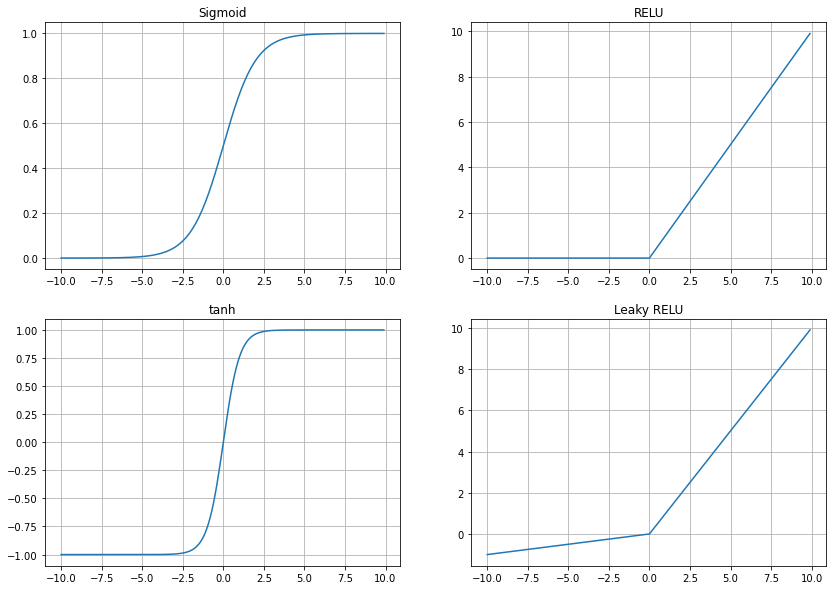

In [3]:
x_var = np.arange(-10,10,0.1)
fig = plt.figure(figsize=(14,10))
# fig.subplots_adjust(hspace=2, wspace=1)
ax = fig.add_subplot(2, 2, 1)
ax.plot(x_var,sigmoid(x_var))
ax.set_title('Sigmoid')
ax.grid()

ax = fig.add_subplot(2, 2, 2)
ax.plot(x_var,RELU(x_var))
ax.set_title('RELU')
ax.grid()

ax = fig.add_subplot(2, 2, 3)
ax.plot(x_var,tanh(x_var))
ax.set_title('tanh')
ax.grid()

ax = fig.add_subplot(2, 2, 4)
ax.plot(x_var,leakyRELU(x_var))
ax.set_title('Leaky RELU')
ax.grid()

## 5. Python Class Implementation <a class="anchor" id="python_class"></a>

Inorder to implement the Dense deep learning neural network for binary classification, extensive use of python dictionaries and numpy arrays were made. A python class which has the appropriate data structures (dictionaries) and functions makes it convenient to code the algorithm.

### 5.1 Data Structure (Dictionary) definitions <a class="anchor" id="python_class1"></a>

The following are the dictionaries defined in the python class. <br>
A overall architecture dictionary stores information about number of nodes in each layer and the activation function stored as a string in each layer. This dictionary is input by the user using a member function called add_layer. The structure of the dictionary is given below.

#### Neural Network Architecture <br>
*{<br>
 Layer 1: [Number of Nodes n1, Activation Function of Layer 1], <br>
 Layer 2: [Number of Nodes n2, Activation Function of Layer 2], <br>
 . <br>
 . <br>
 Layer L: [Number of Nodes nL, Activation Function of Layer L] <br>
}*

The parameters $W,b$, the activations $Z$ and $A$, and all the derivatives $dW, db, dA. dZ$  are also defined as python dictionaries. The keys to the dictionary are again the layer index. The general structure of all the data dictionaries is as shown below,

#### Weights & Derivatives of the Weights <br>
*{<br>
Layer 1: np.array(n1,n0), <br>
Layer 2: np.array(n2,n1),<br>
.<br>
.<br>
Layer L: np.array(nL,nL-1)<br>
}*<br>

#### Biases & Derivatives of the Biases <br>
*{<br>
Layer 1: np.array(n1,1), <br>
Layer 2: np.array(n2,1),<br>
.<br>
.<br>
Layer L: np.array(nL,1)<br>
}*<br>

#### Z & A Activations <br>

Activations <br>
*{<br>
Layer 1: np.array(n1,m), <br>
Layer 2: np.array(n2,m),<br>
.<br>
.<br>
Layer L: np.array(nL,m)<br>
}*<br>

### 5.2 Member Functions  <a class="anchor" id="python_class2"></a>

There are many member functions defined in the class to enable sequential population of the data structures with data and implementation of gradient descent through forward and backward propagations. 
1. *input_data* - Ingests and scales the features and stores the response in appropriate arrays
2. *add_layer* - Function for adding layers to the neural network architecture. Takes 2 argument viz., no. of nodes in each layer and the activation function for the layer. The choices for the activation functions are *sigmoid, tanh, RELU and leakyRELU*
3. *nn_compile* - This function tries to mimic the compilation step used in the TensorFlow except here there is no actual compilation , but initialization of all the weight (random) and bias matrices. 
4. *fit* -  This function incorporates the forward and backward propagation of the gradient descent algorithm. It takes in the number of epochs (number of iterations of gradient descent) and a learning rate
5. *summary* - Shows the structure of the defined neural network
6. *predict* - The predict functions calculates and returns the probability and the class label for a new data input.<br>


The python class definition is shown below. The inputs and output are similar to TensorFlow Keras API.

### 5.3 Code Listing <a class="anchor" id="python_class3"></a>

In [4]:
class dense_NN():
    def __init__(self):
        np.random.seed(1)
        self.nn_struct={}
        self.index = int(0)
        self.W = {}
        self.b = {}
        self.Z = {}
        self.A = {}
        self.dA = {}
        self.dZ = {}
        self.dW = {}
        self.dB = {}
        #self.cost = []
        self.cost_list=np.array([])
    
    ###################Scaler###################
    def scaler_fit(self,X):
        self.X_max = X.max(0)
        self.X_min = X.min(0)
            
    def scaler_transform(self,X):
        return (X-self.X_min)/(self.X_max-self.X_min)
    
    ############################################
    
    #################Activation functions & derivatives###################
    ############Activation Functions############
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def RELU(self,x):
        return np.maximum(0,x)
    
    def tanh(self,x):
        return np.tanh(x)
    
    def leakyRELU(self,x):
        return np.maximum(0.01*x,x)
    
    #############Derivatives#####################
    def dsigmoid(self,X):
        return self.sigmoid(X)*(1-self.sigmoid(X))
    
    def dRELU(self,x):
        return np.where(x>=0.0,1,0)   
    
    def dtanh(self,X):
        return (1-np.square(np.tanh(X)))
    
    def dleakyRELU(self,x):
        return np.where(x>=0,0.01,1.0)
    
    ##############################################
    
    def g(self,X,fun="RELU"):
        if fun=="RELU":
            return self.RELU(X)
        if fun=="tanh":
            return self.tanh(X)
        if fun=='sigmoid':
            return self.sigmoid(X)
        if fun=='leakyRELU':
            return self.leakyRELU(X)
    
    def g_prime(self,X,fun="RELU"):
        if fun=="RELU":
            return self.dRELU(X)
        if fun=="tanh":
            return self.dtanh(X)
        if fun=='sigmoid':
            return self.dsigmoid(X)
        if fun=='leakyRELU':
            return self.dleakyRELU(X)
    ####################################################################################
    
    ################################Cost Function########################################
    def cost(self,y_true,y_pred):
        m = y_true.shape[1]
        return -np.sum(np.multiply(y_true,np.log(y_pred))+np.multiply((1-y_true),np.log(1-y_pred)))/m
    
    #####################################################################################
           
    def input_data(self,X,y):
        self.scaler_fit(X)
        X_scaled = self.scaler_transform(X)
        self.X = X_scaled
        self.y = y.reshape((1,-1))
        self.m = X_scaled.T.shape[1]
        self.n0 = X_scaled.shape[1]
        self.A.update({0:self.X.T})

    def add_layer(self,nodes=5,act_fun='RELU'):
        self.index += 1
        add_lay = {self.index:[nodes,act_fun]}
        self.nn_struct.update(add_lay)
        
    def summary(self):
        n_param = 0
        L = max(sorted(self.nn_struct))
        for i in range(1,L+1):
            nodes = self.nn_struct[i][0]
            act_fun = self.nn_struct[i][1]
            print("Layer:",i," Node Count:",nodes," Activation Function:",act_fun)
            if i==1:
                n_param += self.n0*nodes + nodes
            else:
                n_param += self.nn_struct[i-1][0]*nodes + nodes
        print("Total Number of Trainable params:",n_param)
        
    
    ######################## Randomize the weight arrays#######################
    def nn_compile(self):
        self.L = max(sorted(self.nn_struct))
        for key,value in sorted(self.nn_struct.items()):
            if(key==1):
                W = 0.02*np.random.rand(value[0],self.n0)
                b = np.zeros((value[0],1))
                self.W.update({key:W})
                self.b.update({key:b})
            else:
                W = 0.02*np.random.rand(value[0],self.nn_struct[key-1][0])
                b = np.zeros((value[0],1))
                self.W.update({key:W})
                self.b.update({key:b})
    ###########################################################################
    
    def forward_prop(self,verbose=False):
        L = max(sorted(self.nn_struct))
        ##############Forward Propagation###############
        for key,value in sorted(self.nn_struct.items()):
            if(key==1):
                Z = np.dot(self.W[key],self.X.T)+self.b[key]
                A = self.g(Z,fun=value[1])
            else:
                Z = np.dot(self.W[key],self.A[key-1])+self.b[key]
                A = self.g(Z,fun=value[1])
            self.Z.update({key:Z})
            self.A.update({key:A})
        ################################################
        cost = self.cost(self.y,self.A[L])
        self.cost_list = np.append(self.cost_list,cost)
        i=len(self.cost_list)
        if verbose:
            print("Epoch: ",i,"Cross Entropy Cost: ",cost)
    
    def back_prop(self):
        ############### Total Number of Layers based on Input###########
        L = max(sorted(self.nn_struct))
        ###############Back Propagation #################
        dAL = - (np.divide(self.y, self.A[L]) - np.divide(1 - self.y, 1 - self.A[L]))
        dZ = dAL*self.g_prime(self.Z[L],fun=self.nn_struct[L][1])
        dW = np.dot(dZ,self.A[L-1].T)/self.m
        dB = np.sum(dZ,axis=1,keepdims=True)/self.m
        dAL_1 =  np.dot(self.W[L].T,dZ)
        
        self.dA.update({L:dAL})
        self.dZ.update({L:dZ})
        self.dW.update({L:dW})
        self.dB.update({L:dB})
        self.dA.update({L-1:dAL_1})
        
        
        for i in range(L-1,0,-1):
            dZ = self.dA[i]*self.g_prime(self.Z[i],fun=self.nn_struct[i][1])
            dW = np.dot(dZ,self.A[i-1].T)/self.m
            dB = np.sum(dZ,axis=1,keepdims=True)/self.m                    
            dAL_1 = np.dot(self.W[i].T,dZ)
            if(i!=1):
                self.dA.update({i-1:dAL_1})
            self.dZ.update({i:dZ})
            self.dW.update({i:dW})
            self.dB.update({i:dB})
         
        for i in range(1,L+1,1):
            self.W[i]=self.W[i]-self.alpha*self.dW[i]
            self.b[i]=self.b[i]-self.alpha*self.dB[i]
    
    def fit(self,alpha=0.01,epochs=100,verbose=False):
        self.alpha = alpha
        for i in range(1,epochs):
            self.forward_prop(verbose)
            if np.isnan(self.cost_list[i-1]):
                break
            self.back_prop()
    
    def predict(self,X_new):
        L = max(sorted(self.nn_struct))
        X_scaled = self.scaler_transform(X_new)
        m = X_new.shape[0]
        A_dict = {}
        Z_dict = {}
        for key,value in sorted(self.nn_struct.items()):
            if(key==1):
                Z = np.dot(self.W[key], X_scaled.T)+self.b[key]
                A = self.g(Z,fun=value[1])
            else:
                Z = np.dot(self.W[key],A_dict[key-1])+self.b[key]
                A = self.g(Z,fun=value[1])
            Z_dict.update({key:Z})
            A_dict.update({key:A})
        y_pred = A_dict[L].reshape(-1)
        y_class = np.zeros(m)
        y_class[y_pred>0.5]=1
        
        return y_pred,y_class
        

## 6. Validation on the Wisconsin Breast Cancer dataset and comparison with TensorFlow <a class="anchor" id="validation"></a>

The Wisconsin Breast Cancer diagnostic dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg. The latest version of the dataset is available on the UCI Machine Learning repository at the following link https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic). The following is the information about the dataset from the *wdbc.names* file in the repo.

### Attribute Information:<br>
Number of instances: 569 <br>

Number of attributes: 32 (ID, diagnosis, 30 real-valued input features) <br>

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none <br>

Class distribution: 357 benign, 212 malignant <br>

The classification task here is to predict to whether for a given set of attributes whether the diagnosis is *benign* or *malignant*


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns

### 6.1 Loading the WI Breast Cancer dataset & EDA <a class="anchor" id="validation1"></a>

In [6]:
df = pd.read_csv('cancer_classification.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

The column *benign_0__mal_1* contains the response labels and as the column header indicates *0* is associated with *benign* diagnosis and *1* with *malignant* diagonsis. A plot showing the distribution of these two categorical variables will be very instructional in deciding on what metrics to use for the machine learning model evaluation.

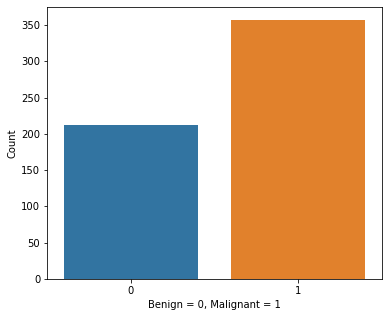

In [7]:
plt.figure(figsize=(6,5))
sns.countplot(x='benign_0__mal_1',data=df)
plt.xlabel("Benign = 0, Malignant = 1")
plt.ylabel("Count")
plt.show()

The response variable is reasonably balanced, hence the overall accuracy metric can be used to evaluate the implemented neural network. The next part of the EDA is look at the correlation plot for the feature matrix to see if any of the X variables are correlated with each other. There are some X variables which are correlated with each other indicated by dark blue colors in the off diagonal region. For the sake of simplicity, these correlated variables weren't removed from the dataset.

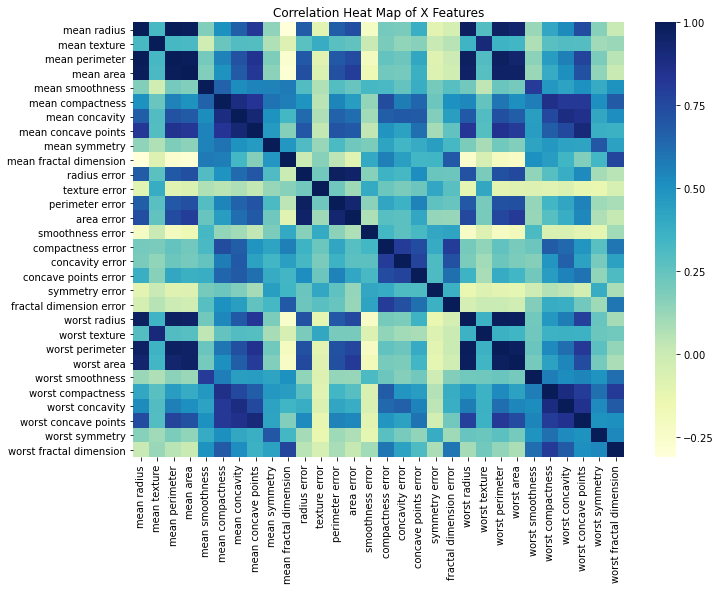

In [8]:
plt.figure(figsize=(11,8))
plt.title("Correlation Heat Map of X Features")
sns.heatmap(df.drop(labels=["benign_0__mal_1"],axis=1).corr(),cmap="YlGnBu")

The pairwise Pearson correlation between all the X feature variables and the response (*benign_0__mal_1*) have been plotted below using a barplot. This again can be used for feature engineering or for dropping some of the features which don't have predictive power. More domain knowledge is required before this determination is made and usually a subject matter expert is consulted.

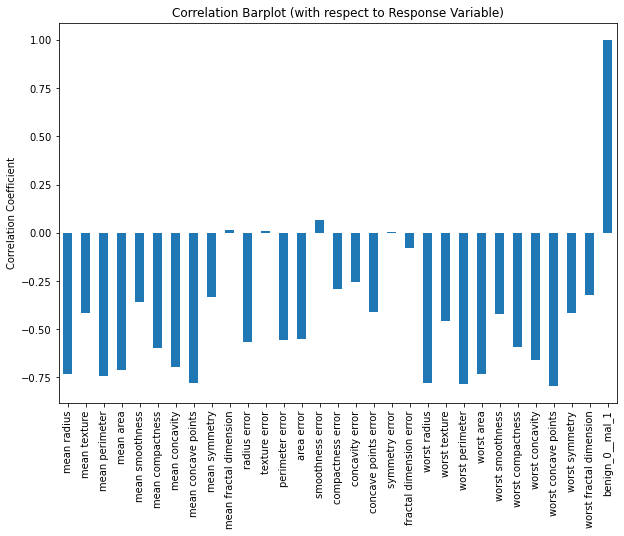

In [9]:
plt.figure(figsize=(10,7))
plt.title('Correlation Barplot (with respect to Response Variable)')
plt.ylabel('Correlation Coefficient')
(df.corr()['benign_0__mal_1']).plot(kind='bar')
plt.show()

That concludes the EDA. The next step is to split the dataset into train and test sets and to perform the model fitting.

### 6.2. Data Cleanup and conversion to numpy arrays <a class="anchor" id="validation2"></a>

In [10]:
df_X = df.drop('benign_0__mal_1',axis=1)
df_y = df['benign_0__mal_1']
X = df_X.to_numpy()
y = df_y.to_numpy()

### 6.3 Train Test Split using scikit learn train test split algorithm <a class="anchor" id="validation3"></a>

Even though the response variable is balanced, a stratified train test split was performed so that the training and test sets have the same ratio of *malignant - 1* to *benign - 0* 

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50,stratify=y)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

The *stratity = y* in the scikit-learn *train_test_split* function makes sure that the ratio of the response labels are the same in the training and test datasets. Cross validation was not used in this study in order to keep the programming simple.

In [12]:
print("Training Set = ",np.unique(y_train,return_counts=True)[1])
print("Test Set = ",np.unique(y_test,return_counts=True)[1])

Training Set =  [148 250]
Test Set =  [ 64 107]


### 6.4 Implemented DL Network Architecture definition <a class="anchor" id="validation4"></a>

Following are the steps which need to performed sequentially to effectively use the implemented Deep Neural Network architecture. Please refer [5.2. Member Functions](#python_class2) for more details. In this particular case a tanh layer with 20 nodes and a RELU layer with 15 nodes were used for constructing the network.  The summary function shows the general architecture of the network and the total number of parameters which need to be trained. It is pretty clear that even for this small network the number of parameters (951 parameters) which needs to be trained is quite large. Compare this to a logistic regression which has only 31 parameters. The last layer always needs to be a sigmoid layer with one single node.

In [13]:
# Creation of a class object and initializing the network
nn1 = dense_NN()
# Data Input 
nn1.input_data(X_train,y_train)

# Adding layers using the add_layer function. 2 layers, a tanh and leakyRELU were added.
nn1.add_layer(nodes=20,act_fun='tanh')
nn1.add_layer(15,act_fun='RELU')

# Addition of the final single node sigmoid layer is mandatory for binary classification task
nn1.add_layer(1,act_fun='sigmoid')

# This randomly initializes all the weight matrices and assigns zeros to the bias arrays
nn1.nn_compile()

print("Structure of the neural network")
nn1.summary()

Structure of the neural network
Layer: 1  Node Count: 20  Activation Function: tanh
Layer: 2  Node Count: 15  Activation Function: RELU
Layer: 3  Node Count: 1  Activation Function: sigmoid
Total Number of Trainable params: 951


### 6.5 The Fitting process <a class="anchor" id="validation5"></a>

With the neural network defined as above the next step is to train the network. The fitting process required two hyperparameters as input, training rate $\alpha$ and number of epochs (number of forward and backward propagations through the network). These are user inputs. There is a verbose flag, which can be made to print out the value of cost function at each epoch to track the convergence of the fitting process.

In [14]:
nn1.fit(alpha=0.05,epochs=15000,verbose=False)

The values of the cost function at each iteration is stored in a list (*cost_list*) which is available for post processing. The below plot shows the convergence of cost function with epoch.

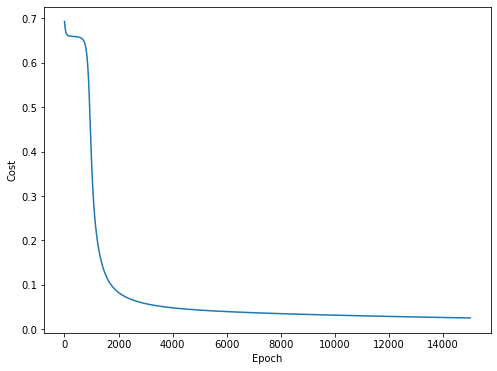

In [15]:
plt.figure(figsize=(8,6))
plt.plot(nn1.cost_list)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

### 6.6 Making Predictions <a class="anchor" id="validation6"></a>
The *predict* function is used for making predictions on the test set or new input data. The implementation of the predict function is straight use of the forward pass stopping at the final layer with probabilities and class label calculations. A threshold probability of 0.5 is used for the class labels' assignment.

In [16]:
y_prob,y_class = nn1.predict(X_test)
print("Predicted Probabilities\n",y_prob)
print("\n")
print("Predicted Class labels\n",y_class)

Predicted Probabilities
 [9.94615906e-01 9.94615906e-01 9.94615906e-01 9.94615906e-01
 3.88345321e-02 3.01816741e-20 6.03458862e-19 9.94615906e-01
 9.94615906e-01 9.94615906e-01 5.17327924e-32 9.94615906e-01
 9.94615906e-01 9.94615906e-01 9.94615906e-01 9.94615906e-01
 9.94615906e-01 9.94615906e-01 9.94615906e-01 5.68370732e-26
 9.94615906e-01 5.35855653e-17 3.89977991e-11 9.94615906e-01
 9.94615906e-01 9.94615906e-01 3.23631464e-30 3.12002436e-01
 9.94615906e-01 9.94615906e-01 9.94615906e-01 1.24242312e-10
 6.07271893e-20 9.94615906e-01 7.35380674e-19 6.02255351e-01
 9.94615906e-01 4.48351905e-22 4.19406693e-02 9.94615906e-01
 9.94615906e-01 3.36910152e-14 9.94615906e-01 7.84373206e-10
 9.94615906e-01 9.94615906e-01 9.94615906e-01 6.36106290e-02
 7.74489108e-01 9.94615906e-01 4.06414386e-28 3.91414853e-20
 8.97867284e-07 8.39497790e-27 9.94615906e-01 8.19194585e-20
 2.20081402e-34 1.28316809e-09 9.94615906e-01 9.94615906e-01
 3.64377658e-21 9.94615906e-01 9.94615906e-01 9.94615906e-01

### 6.7 Evaluating the model performance <a class="anchor" id="validation7"></a>

The model performance is evaluated using the Scikit-Learn *classification_report* and *confusion matrix* functions. The model is highly accurate across all measures as shown below.

In [17]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix \n")
print(confusion_matrix(y_test,y_class))

Confusion Matrix 

[[ 61   3]
 [  2 105]]


In [18]:
print('Classification Report \n')
print(classification_report(y_test,y_class))

Classification Report 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        64
           1       0.97      0.98      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



The plot below shows the Actual vs Predicted labels for the test set as a scatter plot with 2 feature variables *mean concave points* and *worst perimeter*. As can be seen visually only a few points are misclassified, which goes to show the performance of the implemented deep learning model.

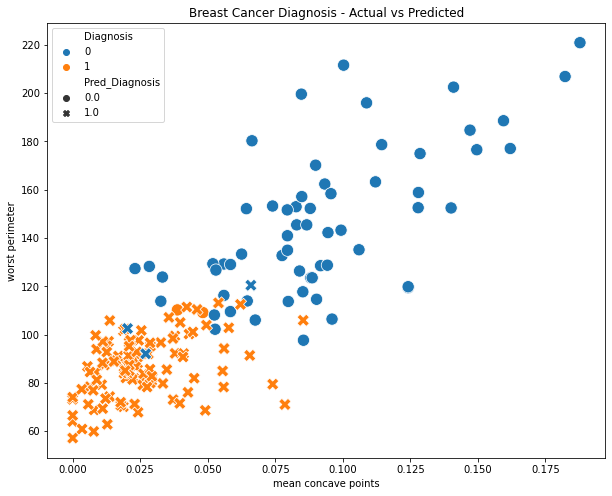

In [52]:
df_test = pd.DataFrame(data=X_test,columns=df_X.columns)
df_test['Diagnosis'] = y_test
df_test['Pred_Diagnosis'] = y_class
plt.figure(figsize=(10,8))
plt.title("Breast Cancer Diagnosis - Actual vs Predicted")
sns.scatterplot(x=df_test['mean concave points'],y=df_test['worst perimeter'],
                hue="Diagnosis",
                style = 'Pred_Diagnosis',
                s = 150,
                sizes = 100,
                data=df_test)
plt.show()

### 6.8 Comparison with TensorFlow <a class="anchor" id="validation8"></a>
TensorFlow is a popular open source library for performing Deep Learning. It acts as a good benchmark to compare any deep other learning libraries. The Keras API was used training and testing a TensorFlow model for the same dataset. The trained TensorFlow model was then used to evaluate the current deep learning implementation.

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

Please refer either https://www.tensorflow.org/ or https://keras.io/guides/functional_api/ on details on how to construct and train a deep learning model.

TensorFlow Dense Neural Network model construction is shown below. Convention used in the implemented network is very similar to how a Dense neural network is constructed using the Keras API.

In [20]:
tf_model = Sequential()
tf_model.add(Dense(units=20,activation='tanh'))
tf_model.add(Dense(units=15,activation='relu'))
tf_model.add(Dense(units=1,activation='sigmoid'))
tf_model.compile(loss='binary_crossentropy', optimizer='adam')

The training process using the *fit* function.

In [21]:
tf_model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_split=0.3,
          verbose=0,
          callbacks=[early_stop]
         )

Epoch 00299: early stopping


Plotting training and validation losses

<Figure size 576x432 with 0 Axes>

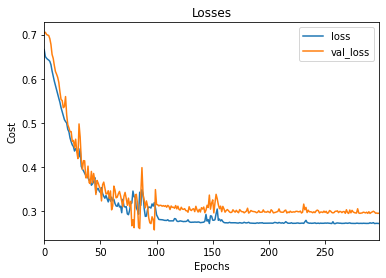

In [22]:
model_loss = pd.DataFrame(tf_model.history.history)
plt.figure(figsize=(8,6))
model_loss.plot()
plt.title("Losses")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

Making predictions with the TensorFlow model

In [23]:
tf_predict = tf_model.predict_classes(X_test)

In [24]:
print("Confusion Matrix \n")
print(confusion_matrix(y_test,tf_predict))

Confusion Matrix 

[[ 49  15]
 [  2 105]]


In [25]:
print('Classification Report \n')
print(classification_report(y_test,tf_predict))

Classification Report 

              precision    recall  f1-score   support

           0       0.96      0.77      0.85        64
           1       0.88      0.98      0.93       107

    accuracy                           0.90       171
   macro avg       0.92      0.87      0.89       171
weighted avg       0.91      0.90      0.90       171



The implemented model outperforms the TensorFlow model in all the test dataset metrics. This exercise serves as a good validation of the implemented model. TensorFlow has a lot of capability for other network architectures like Convolutional Neural networks, Recurrent Neural networks, Generative Adversarial networks etc. It is a good benchmark for evaluating other neural network frameworks.

## 7. Conclusion <a class="anchor" id="conclusion"></a>

In this notebook, a deep learning neural network was successfully developed from scratch using only python dictionaries and numpy arrays for binary classification task. Traditional gradient descent aglorithm was used for fitting the weights and biases. A systematic approach was followed for creating the python class with definition of data structures followed by member functions. The syntax for training and testing the network is very similar to the TensorFlow Keras API. The next steps are to test the model against more datasets & observe it's performance, extend it to other machine learning tasks like regression & and multiclass classification and finally to develop a framework for productionizing the model (saving and deploying). These will be explored in future notebooks.